In [1]:
import networkx as nx
import numpy as np

## ASAP example code

In [2]:
G = nx.DiGraph()

In [3]:
G.add_node(1, t_level = 0, priority = 0, WECT=1)
G.add_node(2, t_level = 0, priority = 0)
G.add_node(3, t_level = 0, priority = 0)
G.add_node(4, t_level = 0, priority = 0)
G.add_node(5, t_level = 0, priority = 0)
G.add_node(6, t_level = 0, priority = 0)
G.add_node(7, t_level = 0, priority = 0)

In [4]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 7))

In [5]:
G.add_edge(1, 2, cost=1)
G.add_edge(2, 4, cost=2)
G.add_edge(3, 5, cost=1)
G.add_edge(6, 7, cost=3)
G.add_edge(1, 6, cost=1)
G.add_edge(2, 3, cost=2)
G.add_edge(4, 5, cost=1)
G.add_edge(5, 7, cost=3)

In [6]:
nx.dag_longest_path(G, weight='cost')

[1, 2, 3, 5, 7]

In [7]:
G.nodes[1]['WECT']

1

In [8]:
nx.dag_longest_path_length(G,weight='cost')+G.nodes[1]['WECT']

8

In [9]:
sorted(list(nx.ancestors(G, 3)))

[1, 2]

In [10]:
sorted(list(G.predecessors(1)))

[]

In [11]:
sorted(list(G.predecessors(2)))


[1]

In [12]:
G.nodes[2]['t_level']

0

In [13]:
G.get_edge_data(1, 2)

{'cost': 1}

In [14]:
G.nodes[2]['t_level'] = np.max((G.nodes[1]['t_level']+G.get_edge_data(1, 2)['cost']), G.nodes[2]['t_level'])
G.nodes[2]['t_level']

1

In [15]:
for node in G.nodes:
    node_prede = sorted(list(G.predecessors(node)))
    for prede in node_prede:
        temp_t_level = G.nodes[prede]['t_level']+G.get_edge_data(prede, node)['cost']
        G.nodes[node]['t_level'] = max(temp_t_level, G.nodes[node]['t_level'])
    print('Node',node,': t_level = ',G.nodes[node]['t_level'])

Node 1 : t_level =  0
Node 2 : t_level =  1
Node 3 : t_level =  3
Node 4 : t_level =  3
Node 5 : t_level =  4
Node 6 : t_level =  1
Node 7 : t_level =  7


In [16]:
node_order = sorted(G.nodes(), key=lambda n: G.nodes[n]['t_level'])
node_order

[1, 2, 6, 3, 4, 5, 7]

In [17]:
G.order()

7

In [18]:
for i in range(G.order()):
    if i == 0:
        G.nodes[node_order[i]]['priority'] = 1
    else:
        if G.nodes[node_order[i]]['t_level'] == G.nodes[node_order[i-1]]['t_level']:
            G.nodes[node_order[i]]['priority'] = G.nodes[node_order[i-1]]['priority']
        else:
            G.nodes[node_order[i]]['priority'] = G.nodes[node_order[i-1]]['priority']+1
for node in G.nodes:
    print('Node',node,': priority = ',G.nodes[node]['priority'])

Node 1 : priority =  1
Node 2 : priority =  2
Node 3 : priority =  3
Node 4 : priority =  3
Node 5 : priority =  4
Node 6 : priority =  2
Node 7 : priority =  5


##  ALAP example code

In [19]:
def single_source_longest_dag_path_length(graph, s):
    dic = dict.fromkeys(graph.nodes, -float('inf'))
    dic[s] = 0
    topo_order = nx.topological_sort(graph)
    for n in topo_order:
        for s in graph.successors(n):
            dic[s] = max(dic[s], dic[n] + graph.edges[n,s]['cost'])
        dic[n] += graph.nodes[1]['WECT']
    return dic

In [20]:
G.add_node(1, b_level = 0, priority = 0, WECT=1)
G.add_node(2, b_level = 0, priority = 0)
G.add_node(3, b_level = 0, priority = 0)
G.add_node(4, b_level = 0, priority = 0)
G.add_node(5, b_level = 0, priority = 0)
G.add_node(6, b_level = 0, priority = 0)
G.add_node(7, b_level = 0, priority = 0)

In [21]:
path_dict = single_source_longest_dag_path_length(G, 1)
path_dict

{1: 1, 2: 2, 3: 4, 4: 4, 5: 5, 6: 2, 7: 8}

In [22]:
max(path_dict, key=path_dict.get)

7

In [23]:
G_longest_path = nx.dag_longest_path_length(G,weight='cost')+G.nodes[1]['WECT']
G_longest_path

8

In [24]:
for node in G.nodes:
    node_longest_path_dict = single_source_longest_dag_path_length(G, node)
    node_longest_path = max(node_longest_path_dict.values())
    G.nodes[node]['b_level'] = node_longest_path
    print('Node',node,': b_level = ',G.nodes[node]['b_level'])

Node 1 : b_level =  8
Node 2 : b_level =  7
Node 3 : b_level =  5
Node 4 : b_level =  5
Node 5 : b_level =  4
Node 6 : b_level =  4
Node 7 : b_level =  1


$ 𝐸𝑆𝑇 = 𝑇_{criticalpath}- 𝑏_i $

In [25]:
node_order = sorted(G.nodes(), key=lambda n: G.nodes[n]['b_level'])
node_order.reverse()
node_order

[1, 2, 4, 3, 6, 5, 7]

In [26]:
for i in range(G.order()):
    if i == 0:
        G.nodes[node_order[i]]['priority'] = 1
    else:
        if G.nodes[node_order[i]]['b_level'] == G.nodes[node_order[i-1]]['b_level']:
            G.nodes[node_order[i]]['priority'] = G.nodes[node_order[i-1]]['priority']
        else:
            G.nodes[node_order[i]]['priority'] = G.nodes[node_order[i-1]]['priority']+1
for node in G.nodes:
    print('Node',node,': priority = ',G.nodes[node]['priority'])

Node 1 : priority =  1
Node 2 : priority =  2
Node 3 : priority =  3
Node 4 : priority =  3
Node 5 : priority =  4
Node 6 : priority =  4
Node 7 : priority =  5


In [27]:
G.nodes.data()

NodeDataView({1: {'t_level': 0, 'priority': 1, 'WECT': 1, 'b_level': 8}, 2: {'t_level': 1, 'priority': 2, 'b_level': 7}, 3: {'t_level': 3, 'priority': 3, 'b_level': 5}, 4: {'t_level': 3, 'priority': 3, 'b_level': 5}, 5: {'t_level': 4, 'priority': 4, 'b_level': 4}, 6: {'t_level': 1, 'priority': 4, 'b_level': 4}, 7: {'t_level': 7, 'priority': 5, 'b_level': 1}})

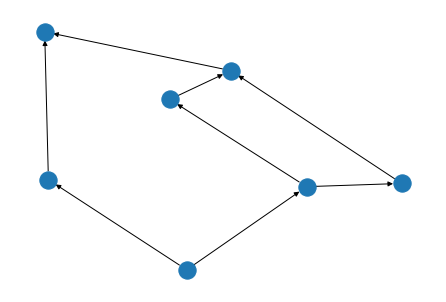

In [28]:
nx.draw(G)

### Drawing 
https://networkx.org/documentation/latest/reference/drawing.html

In [29]:
sorted(G.nodes(), key=lambda n: G.nodes[n]['b_level'])

[7, 5, 6, 3, 4, 2, 1]

In [30]:
node_order = sorted(G.nodes(), key=lambda n: G.nodes[n]['b_level'])
node_order.reverse()
node_order

[1, 2, 4, 3, 6, 5, 7]

## Test on real DAG file

### Tasks_1

In [32]:
dag_file_path = './DAG example/Tasks_1_Run_0.csv'

# R,1
# M,8
# #
# T,1,500,500,0
# V,1,1,0,0,65,86
# V,1,2,0,0,32,42,1
# V,1,3,0,0,81,107,2
# V,1,4,0,0,5,6,3
# V,1,5,0,0,26,34,1
# V,1,6,0,0,52,69,5
# V,1,7,0,0,59,78,6
# V,1,8,0,0,37,49,4,7
# V,1,9,0,0,26,34,8
